# MTANGFS TOOL

In [1]:
import mtagtfs

## Collect

In [ ]:
# 'collect' function takes APIkey as an input, keeps requesting MTA subway real-time status and writting gtfs files.
APIkey = 'YOUR MTA SUBWAY API KEY'
mtagtfs.collect(APIkey)

## Actual Arrival

In [2]:
date = '20180801'

In [3]:
# 'arrival' function takes date as an input, structures and integrates the GTFS files, and outputs a arrival csv file.
mtagtfs.arrival(date)

47 GTFS files cannot be parsed


## Delay

In [4]:
# 'delay' function takes date as an input, calculates delays by actual arrivals and schedules, and outputs a delay csv file.
mtagtfs.delay(date, date_schedule = '20180708')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3191: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


# Analysis

In [5]:
date = '20180801'
year, month, day = date[:4], date[4:6], date[6:8]

In [6]:
import pandas as pd
df_arrival = pd.read_csv(year + month + '/arrival_' +  year + month + day + '.csv', index_col=0)
print(df_arrival.shape)
df_arrival.head()

(156563, 9)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,gtfs_timestamp,trip_id,arrival_time,stop_id,route_id,current_stop_sequence,current_status,vehicle_timestamp,vehicle_stop_id
0,1533181992,000650_1..S03R,0,101S,1,0,2,0,NaN
1,1533181992,144900_1..N03R,0,142N,1,0,2,0,NaN
2,1533181992,145900_1..N03R,0,142N,1,0,2,0,NaN
3,1533181992,002550_1..S03R,0,101S,1,0,2,0,NaN
4,1533095893,137900_1..N03R,1533095916,101N,1,38,0,1533095891,101N


In [7]:
import pandas as pd
df_delay = pd.read_csv(year + month + '/delay_' +  year + month + day + '.csv', index_col=0)
print(df_delay.shape)
df_delay.head()

(40934, 15)


,gtfs_timestamp,trip_id,arrival_time,stop_id,route_id,current_stop_sequence,current_status,vehicle_timestamp,vehicle_stop_id,weekday,trip_id2,match_id,arrival_time_scheduled,departure_time_scheduled,delay
0,2018-08-01 00:33:13,000650_1..S,2018-08-01 00:34:06,120S,1,18,2,2018-08-01 00:33:09,120S,Weekday,Weekday-000650_1..S,Weekday-000650_1..S//120S,2018-08-01 00:33:00,00:33:00,66.0
1,2018-08-01 00:38:13,000650_1..S,2018-08-01 00:39:46,123S,1,19,2,2018-08-01 00:38:08,123S,Weekday,Weekday-000650_1..S,Weekday-000650_1..S//123S,2018-08-01 00:37:30,00:37:30,136.0
2,2018-08-01 00:43:13,000650_1..S,2018-08-01 00:43:07,125S,1,21,1,2018-08-01 00:42:37,125S,Weekday,Weekday-000650_1..S,Weekday-000650_1..S//125S,2018-08-01 00:40:30,00:40:30,157.0
3,2018-08-01 00:48:13,000650_1..S,2018-08-01 00:47:53,128S,1,24,1,2018-08-01 00:47:23,128S,Weekday,Weekday-000650_1..S,Weekday-000650_1..S//128S,2018-08-01 00:45:30,00:45:30,143.0
4,2018-08-01 00:53:13,000650_1..S,2018-08-01 00:53:40,132S,1,28,1,2018-08-01 00:53:10,132S,Weekday,Weekday-000650_1..S,Weekday-000650_1..S//132S,2018-08-01 00:49:30,00:49:30,250.0


Text(0.5, 1.0, 'MTA Subway Delay Stats for B-Division trains on 2018/08/01')

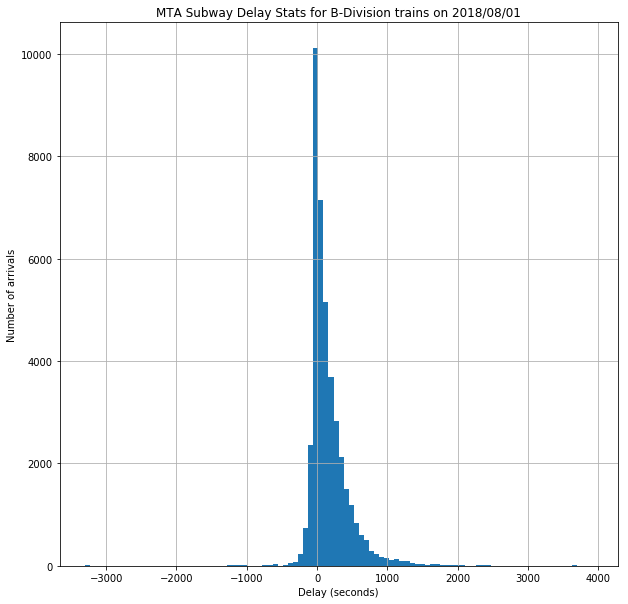

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
df_delay.delay.hist(bins=100)
plt.xlabel('Delay (seconds)')
plt.ylabel('Number of arrivals')
plt.title('MTA Subway Delay Stats for B-Division trains on 2018/08/01')